**(Dataset Exploration Title)**

**by Abdelrahman Ragab**

**Preliminary Wrangling**

**fordgobike-data of 2017**
Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018.




In [26]:
# import all packages and set plots to be embedded inline
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sb

import seaborn as sns


In [57]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [60]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


let's change start and end time to datetime

In [62]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


let's change user type and member gender to be category 

In [63]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')


In [64]:
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), obj

In [66]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [67]:
df.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [68]:
df.duplicated().sum()


0

In [69]:
df.member_gender.value_counts()


Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [70]:
df.user_type.value_counts()


Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [71]:
df.bike_share_for_all_trip.value_counts()


No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [72]:
df.shape

(183412, 16)

create new coloumns to make the visulization much easier 

In [73]:
df['member_age'] = 2021 - df['member_birth_year']


In [74]:
df['start_time_month'] = df['start_time'].dt.strftime('%B')

df['start_time_monthly'] = df['start_time'].dt.strftime('%y-%m') # Ex. 2019-04-07 >> 19-04 
df['start_time_day']=df['start_time'].dt.strftime('%A')

df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

df['duration_min'] = (df['duration_sec']/60).astype(float)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
member_age                 175147 non-null float64
start_time_mon

In [76]:
df.dropna(inplace=True)

In [77]:
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['member_age'] = df['member_age'].astype('int')


In [78]:
pd.set_option('display.max_columns', None) # Show all datafram columns.
sns.set(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(20,7)})
base_color = sns.color_palette()[0]


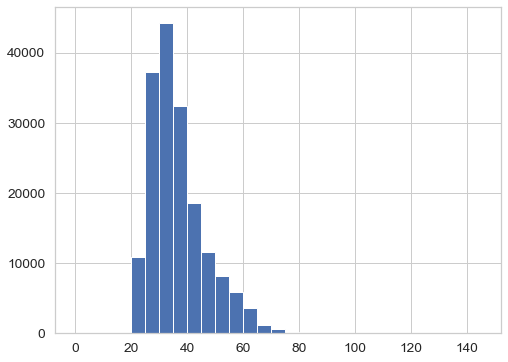

In [79]:
plt.figure(figsize=[8, 6])
bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(df['member_age'].dropna(), bins=bins);


In [80]:
df['member_age'].max()

143

the age more than 80 is potential outliers.
I will delete all memebers with age more than 80 years.



In [81]:
df.drop(df[df.member_age > 80].index, inplace=True)


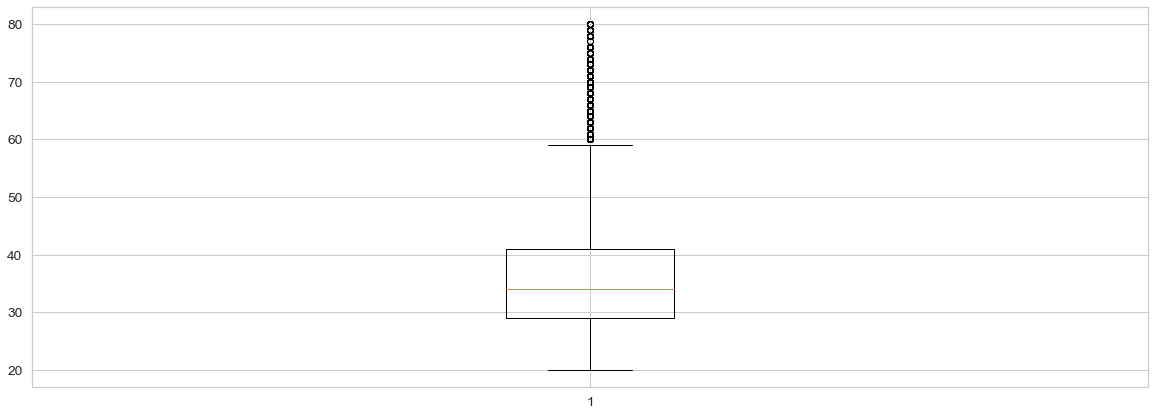

In [82]:
plt.boxplot(df['member_age']);

I will divide members age into 7 categories.

11-20

21-30

31-40

41-50

51-60

61-70

71-80

In [83]:
def category(age):
    if 10<age<=20:
        return '11-20'
    
    elif 20<age<=30:
        return '21-30'  
    
    elif 30<age<=40:
        return '31-40'
    
    elif 40<age<=50:
        return '41-50'
    
    elif 50<age<=60:
        return '51-60'
    
    elif 60<age<=70:
        return '61-70'

    
    elif 70<age<=80:
        return '71-80'

df['age_category'] = df['member_age'].apply(category)


In [84]:
df['age_category'].value_counts()


31-40    72648
21-30    56626
41-50    27787
51-60    12897
61-70     4108
71-80      649
11-20       34
Name: age_category, dtype: int64

**What is the structure of your dataset?**

The forgobike trip data are 183412 rides that happend in 2017 The dataset contain features about:


1-trip duration: duration_sec, start_time, end_time

2-station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude

3-member info (anonymized): bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip
Derived features/variables to assist exploration and analysis:

4-trip info: duration_minute, start_date, start_hourofday, start_dayofweek, start_month

5-member: member_age



**What is/are the main feature(s) of interest in your dataset?**


The main features are about behaviors of users..Like Where did he start and where did he end, and when?

Also:

Average duration

Any day? month?

Any time of day?

Average age of users, and what most user type are used.


**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

Each trip's start date/time and duration information will help understanding how long a trip usually takes and when.

The member information like user type, gender and age will help us find out who are the main target customer groups,
use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.



**Univariate Exploration**

1. The Hourly Usage of Bike Rides

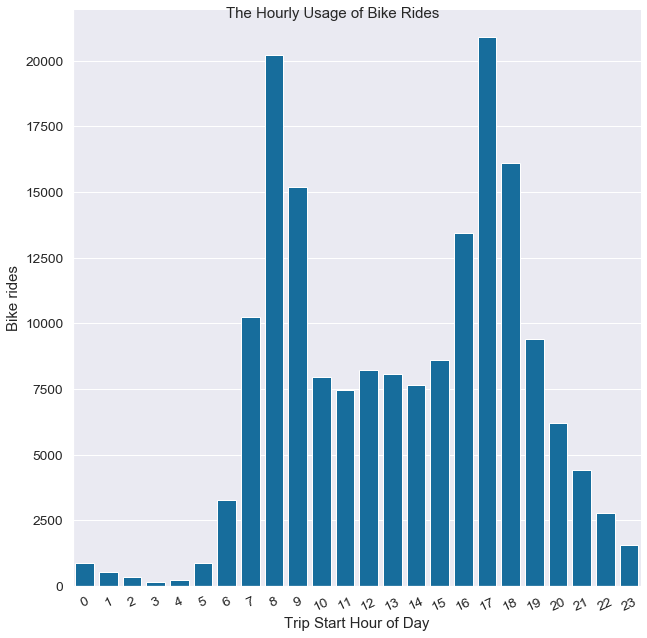

In [91]:
lm  = sns.catplot(data=df, x='start_time_hour', kind='count', color = base_color, height = 9)
lm.set_axis_labels('Trip Start Hour of Day' , 'Bike rides')

lm.set_xticklabels(rotation=25)
lm.fig.suptitle('The Hourly Usage of Bike Rides', fontsize=15);


In [93]:
df[df.start_time_hour == 17].count()[0]


20892

The above figure show number of rides for each Hour during the day. And we can see 17 ~= 5 pm is has the highest number of rides (trips) 20892 rides.



**2. The Daily Usage of Bike Rides**


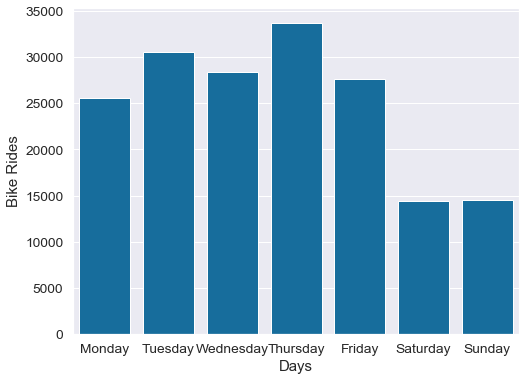

In [109]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_time_day'] = df['start_time_day'].astype(weekdaycat)


sb.countplot(data=df, x='start_time_day', color=base_color);
plt.xlabel('Days');
plt.ylabel('Bike Rides');


the number of rides (trips) per day, and we can see the weekend(sat-san) it is has the lowest number of rides, and the weekdays rides are close to each other.



**3.Number of Bike Rides during the Day hours**


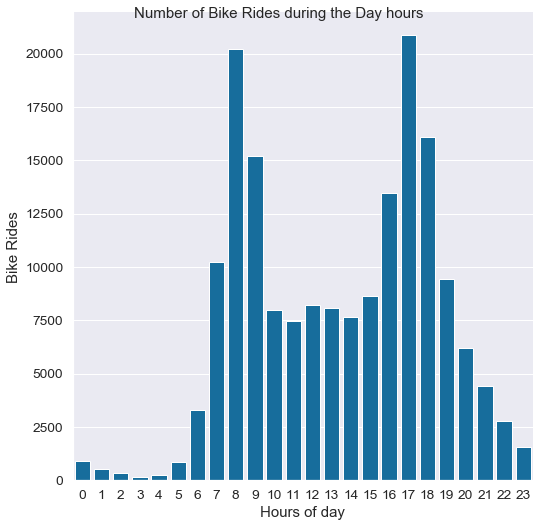

In [112]:
lm  = sns.catplot(data=df, x='start_time_hour', kind='count', color = base_color, height = 7.5)
lm.set_axis_labels("Hours of day", "Bike Rides")

lm.fig.suptitle('Number of Bike Rides during the Day hours', fontsize=15);


this figure over day hours peaks around two timeframes, 8am-9am and 17pm-18pm, 
during typical rush hours. 
Looking in combined with the trip distribution over day of week plot, 
it is quite obvious that the majority of rides happened on work days (Mon-Fri). 



**4-Number and Percentage of Bike Rides for 11 to 80 Years Old**

In [113]:
nm_category_df = df.groupby('age_category').agg({'bike_id':'count'})
nm_category_df['percentage'] = (nm_category_df['bike_id']/nm_category_df['bike_id'].sum())*100
nm_category_df

,bike_id,percentage
age_category,,
11-20,34,0.019456
21-30,56626,32.404191
31-40,72648,41.572770
41-50,27787,15.901092
51-60,12897,7.380300
61-70,4108,2.350800
71-80,649,0.371390


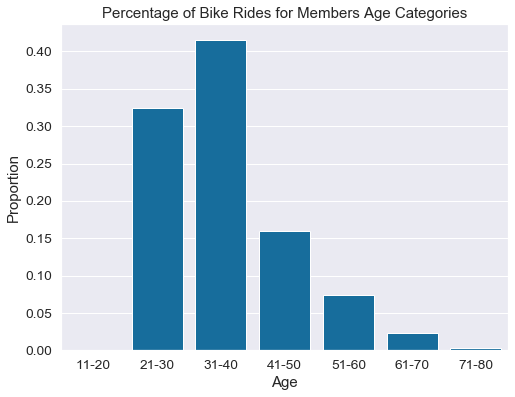

In [116]:
n_points = df.shape[0]

max_count_age = df['age_category'].value_counts().max()
max_prop_age = max_count_age / n_points

tick_props_age = np.arange(0, max_prop_age, 0.05)
tick_names_age = ['{:0.2f}'.format(v) for v in tick_props_age]

my_order = ['11-20', '21-30', '31-40', '41-50', '51-60' , '61-70', '71-80']
sns.countplot(data=df, x='age_category', color=base_color, order=my_order)


ax = plt.gca()
plt.yticks(tick_props_age * n_points, tick_names_age)
ax.set_ylabel('Proportion')
ax.set_xlabel('Age')
ax.set_title("Percentage of Bike Rides for Members Age Categories", fontsize=15);


**The next several plots are around members/users to see what makes up of the riders.**


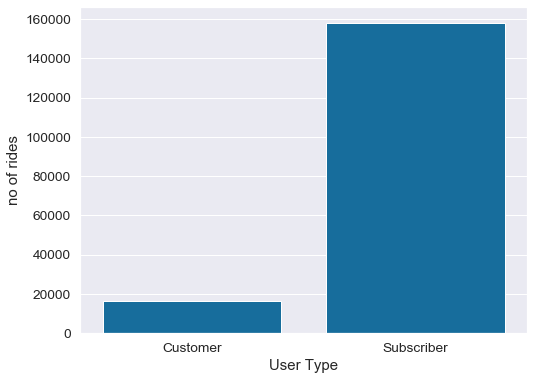

In [153]:
sb.countplot(data=df, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('no of rides');


**Percentage of Bike Rides for Members Gender**

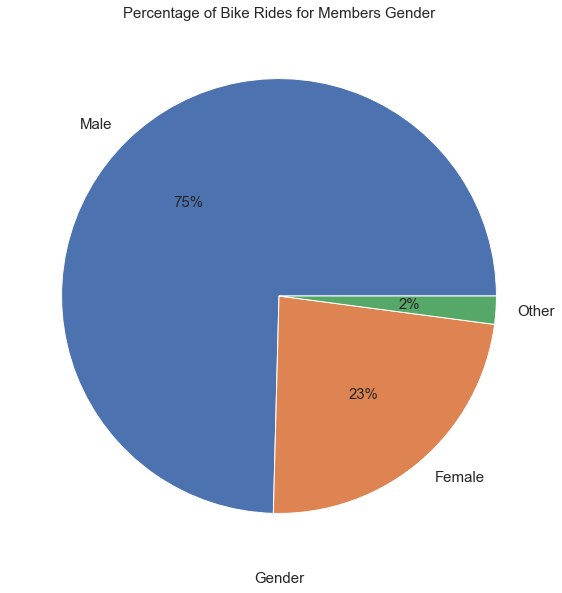

In [121]:
df.member_gender.value_counts().plot(kind='pie', figsize=(10,10),fontsize =15, autopct='%1.0f%%')

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Gender')
ax.set_title("Percentage of Bike Rides for Members Gender", fontsize=15);


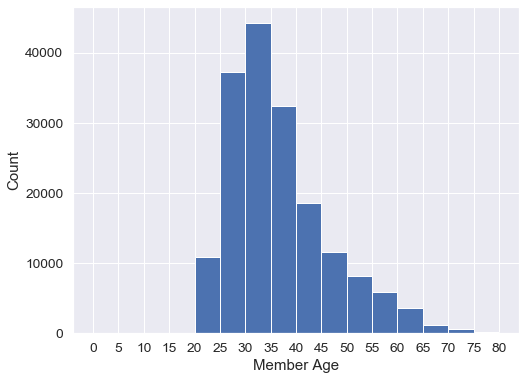

In [120]:
bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');


conclousion :

Most of riders were males subscribers who did not use bike share for all trips.
Most members were around 25 to 45 years old, corresponding to the trip distribution plots that most trips were on wordays 7-9  and 16_19 rush hours of a day. As the age gets older, bike usage become small.



**Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**


I cleand all variables that need to clean like change the date to datetime object. So, I think my dataset is ready to visualization.

I didn't have any unusual points. Everything was normal like at the weedend the rides was decreased and on the sleeping tims as well.

The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri) compared to weekends.


 there were more male riders than female, and most members were subscribers compared to casual riders. 
 
 The majority of the members did not use bike share for all of their trips, and most were around 25 to 45 years old.


No transformation was needed 

**Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

I removed data that contain age more than 80. And i created new columns and changed some data type to date.



**Bivariate Exploration**

Average Trip Duration on Weekdays

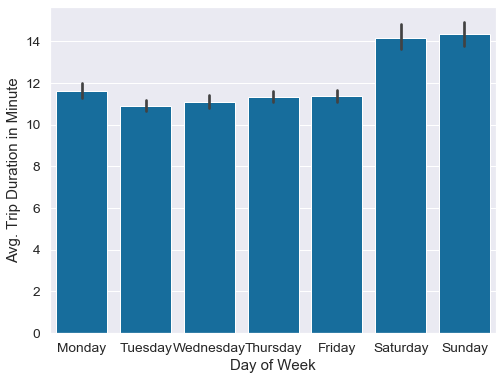

In [129]:
sb.barplot(data=df, x='start_dayofweek', y='duration_min', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');


The riding trips are much shorter on Monday through Friday compared to weekends. so we can see the usage of the sharing system on normal work days, while more casual flexible use on weekends.



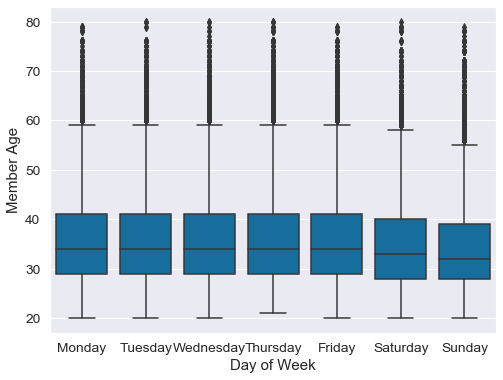

In [132]:
sb.boxplot(data=df, x='start_dayofweek', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');


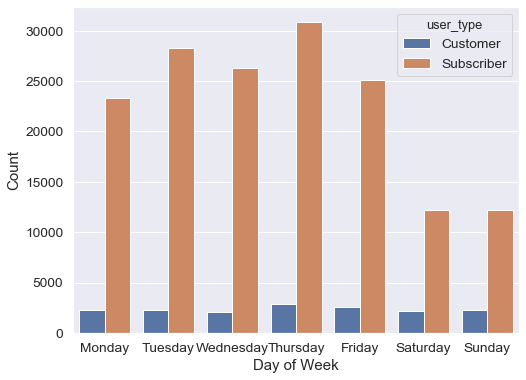

In [134]:
sb.countplot(data=df, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');


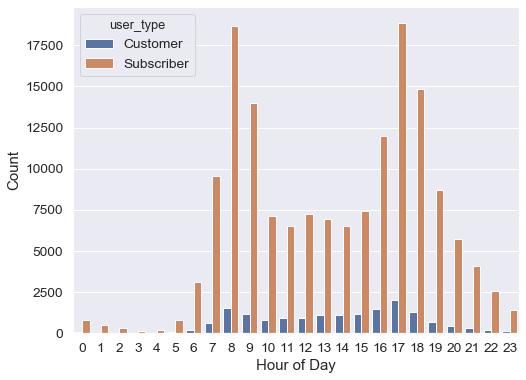

In [137]:
sb.countplot(data=df, x='start_time_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');


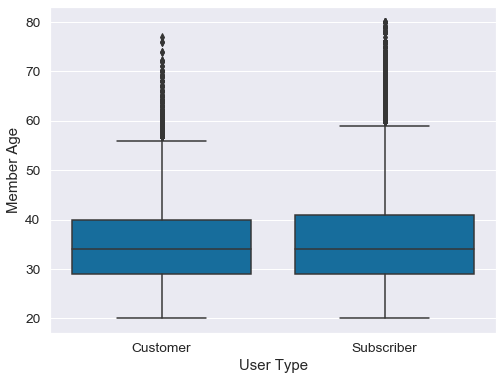

In [138]:
#Member age between customers and subscribers

sb.boxplot(data=df, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');


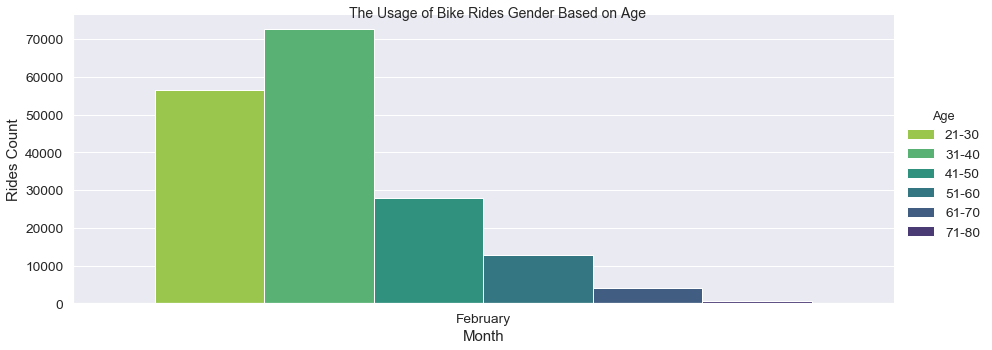

In [154]:
my_order = ['21-30', '31-40', '41-50', '51-60','61-70' , '71-80']
lm = sns.catplot(data=df, x='start_time_month', hue='age_category', kind='count',aspect=20.7/8.27, color=base_color,
                hue_order=my_order, palette='viridis_r')

lm.set_axis_labels('Month', 'Rides Count')
lm._legend.set_title('Age')
lm.fig.suptitle('The Usage of Bike Rides Gender Based on Age', fontsize=14);


The previous figure it is show the number of rides (trips) based on ages.



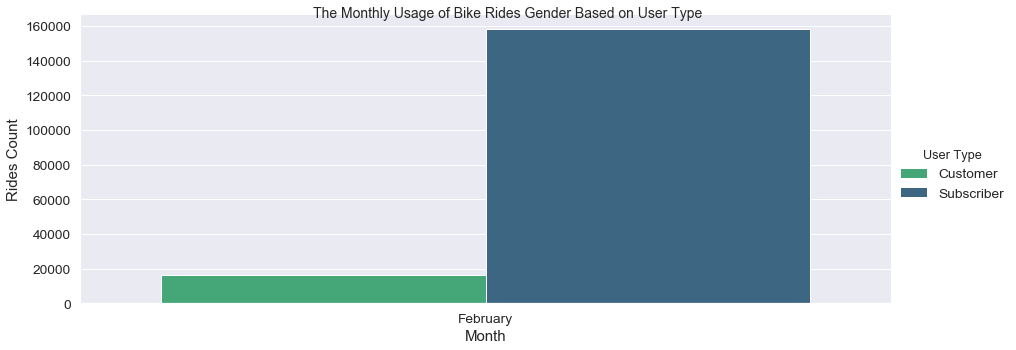

In [140]:
my_order = ['21-30', '31-40', '41-50', '51-60','61-70' , '71-80']
lm = sns.catplot(data=df, x='start_time_month', hue='user_type', kind='count',aspect=20.7/8.27, color=base_color,
                palette='viridis_r')

lm.set_axis_labels('Month', 'Rides Count')
lm._legend.set_title('User Type')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on User Type', fontsize=14);


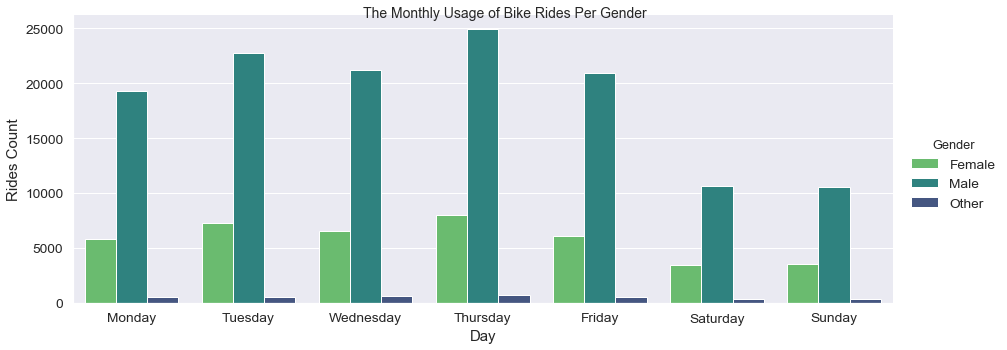

In [141]:
lm = sns.catplot(data=df, x='start_time_day', hue='member_gender', kind='count',aspect=20.7/8.27, color=base_color,
                palette='viridis_r')

lm.set_axis_labels('Day', 'Rides Count')
lm._legend.set_title('Gender')
lm.fig.suptitle('The Monthly Usage of Bike Rides Per Gender', fontsize=14);


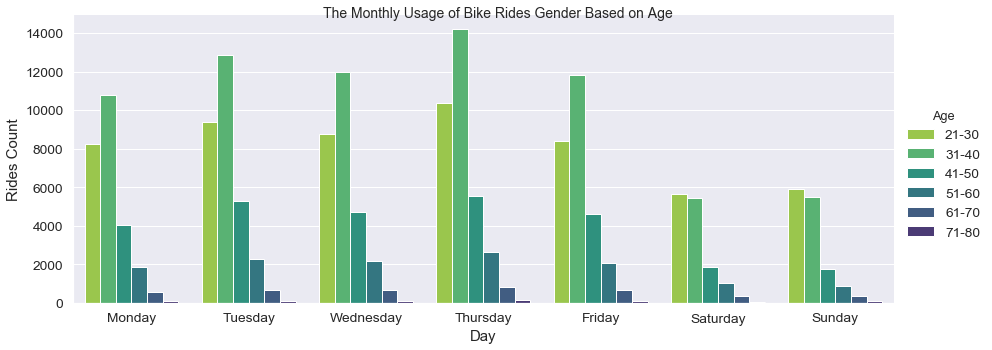

In [142]:
lm = sns.catplot(data=df, x='start_time_day', hue='age_category', kind='count',aspect=20.7/8.27, color=base_color,
                hue_order=my_order, palette='viridis_r')

lm.set_axis_labels('Day', 'Rides Count')
lm._legend.set_title('Age')
lm.fig.suptitle('The Monthly Usage of Bike Rides Gender Based on Age', fontsize=14);


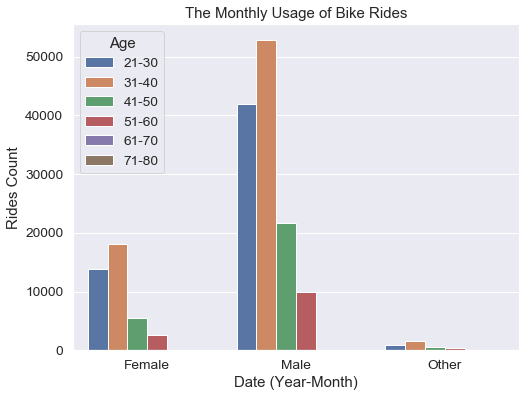

In [143]:
ax = sns.countplot(x='member_gender', hue='age_category', hue_order=my_order,
                   data=df[df['age_category'].isin(['21-30', '31-40', '41-50', '51-60'])]
                   .sort_values(by=['start_time_monthly']))

ax.legend().set_title('Age')
ax.set_ylabel('Rides Count')
ax.set_xlabel('Date (Year-Month)')
ax.set_title("The Monthly Usage of Bike Rides", fontsize=15);


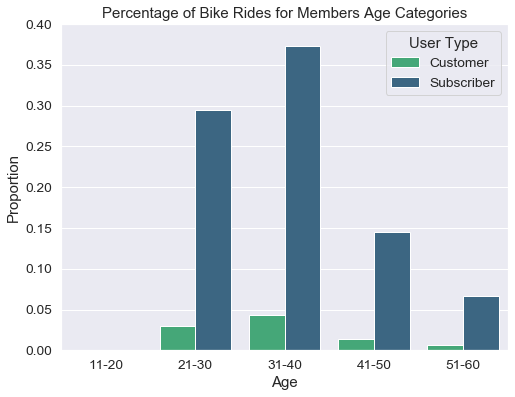

In [144]:
n_points = df.shape[0]

max_count_age = df['age_category'].value_counts().max()
max_prop_age = max_count_age / n_points

tick_props_age = np.arange(0, max_prop_age, 0.05)
tick_names_age = ['{:0.2f}'.format(v) for v in tick_props_age]

my_order = ['11-20', '21-30', '31-40', '41-50', '51-60']
sns.countplot(data=df, x='age_category', hue='user_type', color=base_color, order=my_order, palette='viridis_r')

ax = plt.gca()
ax.legend().set_title('User Type')
plt.yticks(tick_props_age * n_points, tick_names_age)
ax.set_ylabel('Proportion')
ax.set_xlabel('Age')
ax.set_title("Percentage of Bike Rides for Members Age Categories", fontsize=15);


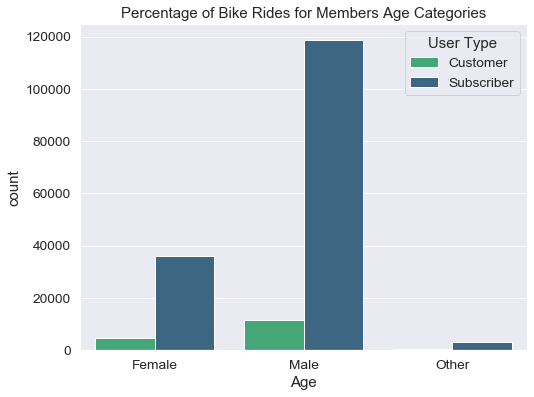

In [145]:
sns.countplot(data=df, x='member_gender', hue='user_type', color=base_color, palette='viridis_r')

ax = plt.gca()
ax.legend().set_title('User Type')
ax.set_ylabel('count')
ax.set_xlabel('Age')
ax.set_title("Percentage of Bike Rides for Members Age Categories", fontsize=15);



**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

Based on user type we can see the different between them.
The Customer has the highest number of trips on the weekend. Unlike subscriber users they have the loset numbrer of trips on weekend.
The most age are 31-40 for subscriber users and 21-30 for customer users.

There are a lot more subscriber usage than customers. 

Subscribers use the bike sharing system for work commnute thus most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends.

Subscriber users are slightly older than customer users who tend to take longer rides overall especially during the summer.


Based on gender we can see a different.

The most ages are 25-40 for all gender (male, female and other).
The Subscriber users are most for all gender.

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides. And October had the most bike riding usage for subscribers throughout the year.








**Multivariate Exploration**



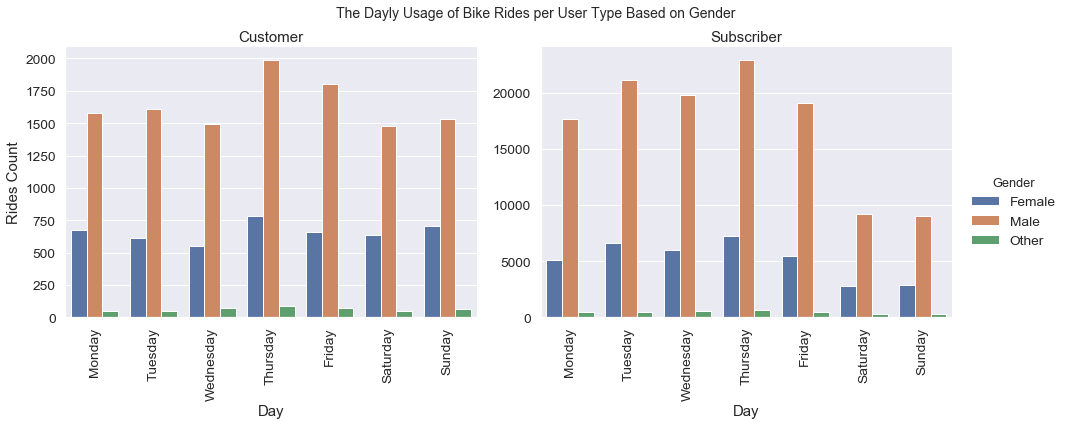

In [146]:
lm = sns.catplot(data=df, x='start_time_day', col="user_type", hue='member_gender', kind='count', aspect=20/15,
                 sharey=False)

lm.set_axis_labels('Day', 'Rides Count')
lm.set_xticklabels(rotation=90)
lm._legend.set_title('Gender')
lm.set_titles('{col_name}')
lm.fig.suptitle('The Dayly Usage of Bike Rides per User Type Based on Gender', fontsize=14, y=1.02);


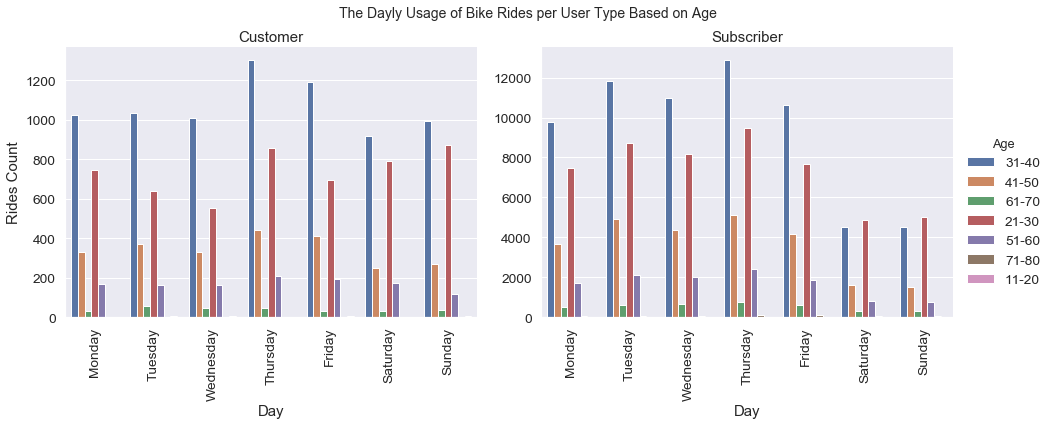

In [147]:
lm = sns.catplot(data=df, x='start_time_day', col="user_type", hue='age_category', kind='count', aspect=20/15,
                 sharey=False)

lm.set_axis_labels('Day', 'Rides Count')
lm.set_xticklabels(rotation=90)
lm._legend.set_title('Age')
lm.set_titles('{col_name}')
lm.fig.suptitle('The Dayly Usage of Bike Rides per User Type Based on Age', fontsize=14, y=1.02);


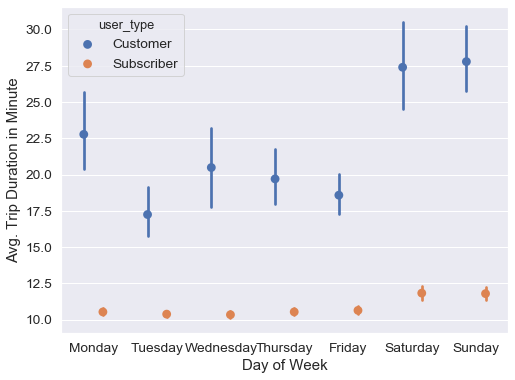

In [150]:
sb.pointplot(data=df, x='start_time_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');


**Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**


The multivariate exploration strengthened some of the patterns discovered in the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.

I extended my investigation with multi different variables user_type, duration_min, member_gender, start_time_day, start_time_month, and age_category. The multivariate exploration here showed that we can see one figure instead of two or more figures, Also showed that customer users are mostly used bike on weekend unlike the subscriber users they used it mostly on weekday, and showed used bike on weekend are 21-30 ages for both customer and subscriber users, and on weed day are 31-40 for all user type. Also showed the customer users have the highset trip duration even they has lowset number of trips.



**Were there any interesting or surprising interactions between features?**

The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. The usage habit difference between male and female is not that much or obvious throughout the exploration, which could be related to the imbalanced number of female riders/records compared to male ones. It'd be interesting to see how male and female use the system differently if there were more female data.


